# Flavor Transformations

This notebook produces the figures in the SNEWPY paper showing the effect of the flavor transformation prescriptions upon the nakazato-shen-z0.004-t_rev100ms-s20.0 model 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 

from python.snewpy.neutrino import Flavor, MassHierarchy
from python.snewpy.models import Nakazato_2013
from python.snewpy.flavor_transformation import NoTransformation, AdiabaticMSW

In [2]:
mpl.rc('font', size=16)

In [3]:
infile = '../../models/Nakazato_2013/nakazato-shen-z0.004-t_rev100ms-s20.0.fits'
model = Nakazato_2013(infile)

In [4]:
model

**Nakazato_2013 Model**: nakazato-shen-z0.004-t_rev100ms-s20.0.fits

|Parameter|Value|
|:---------|:-----:|
|Progenitor mass | $20$ $\mathrm{M_{\odot}}$|
|Metallicity | $0.004$|
|Revival time | $100$ $\mathrm{ms}$|
|EOS | SHEN|

## Untransformed and Transformed Spectra at Earth

Compute the spectra at Earth for a SN at 10 kpc with no flavor transformation, and with the chosen flavor transformation.


In [5]:
# Using the Adiabatic MSW prescription. NMO is used by default.
xform_nmo = AdiabaticMSW()
xform_imo = AdiabaticMSW(mh=MassHierarchy.INVERTED)

# Energy array and time to compute spectra from the simulation.
# Note that any convenient units can be used and the calculation will remain internally consistent.
energies = np.linspace(0,60,121) * u.MeV
t = 100*u.ms
d = 10 # distance in kpc

#get the spectra
ispec = model.get_initial_spectra(t, energies)
ospec_nmo = model.get_transformed_spectra(t, energies, xform_nmo)
ospec_imo = model.get_transformed_spectra(t, energies, xform_imo)

#divide by 4 pi d^2 to get the fluxes
for j, E in enumerate(energies):
    for flavor in Flavor:
        ispec[flavor][j] /= (4.*np.pi*(d*1000*3.086e+18)**2)
        ospec_nmo[flavor][j] /= (4.*np.pi*(d*1000*3.086e+18)**2)
        ospec_imo[flavor][j] /= (4.*np.pi*(d*1000*3.086e+18)**2)

## Plot the fluxes 

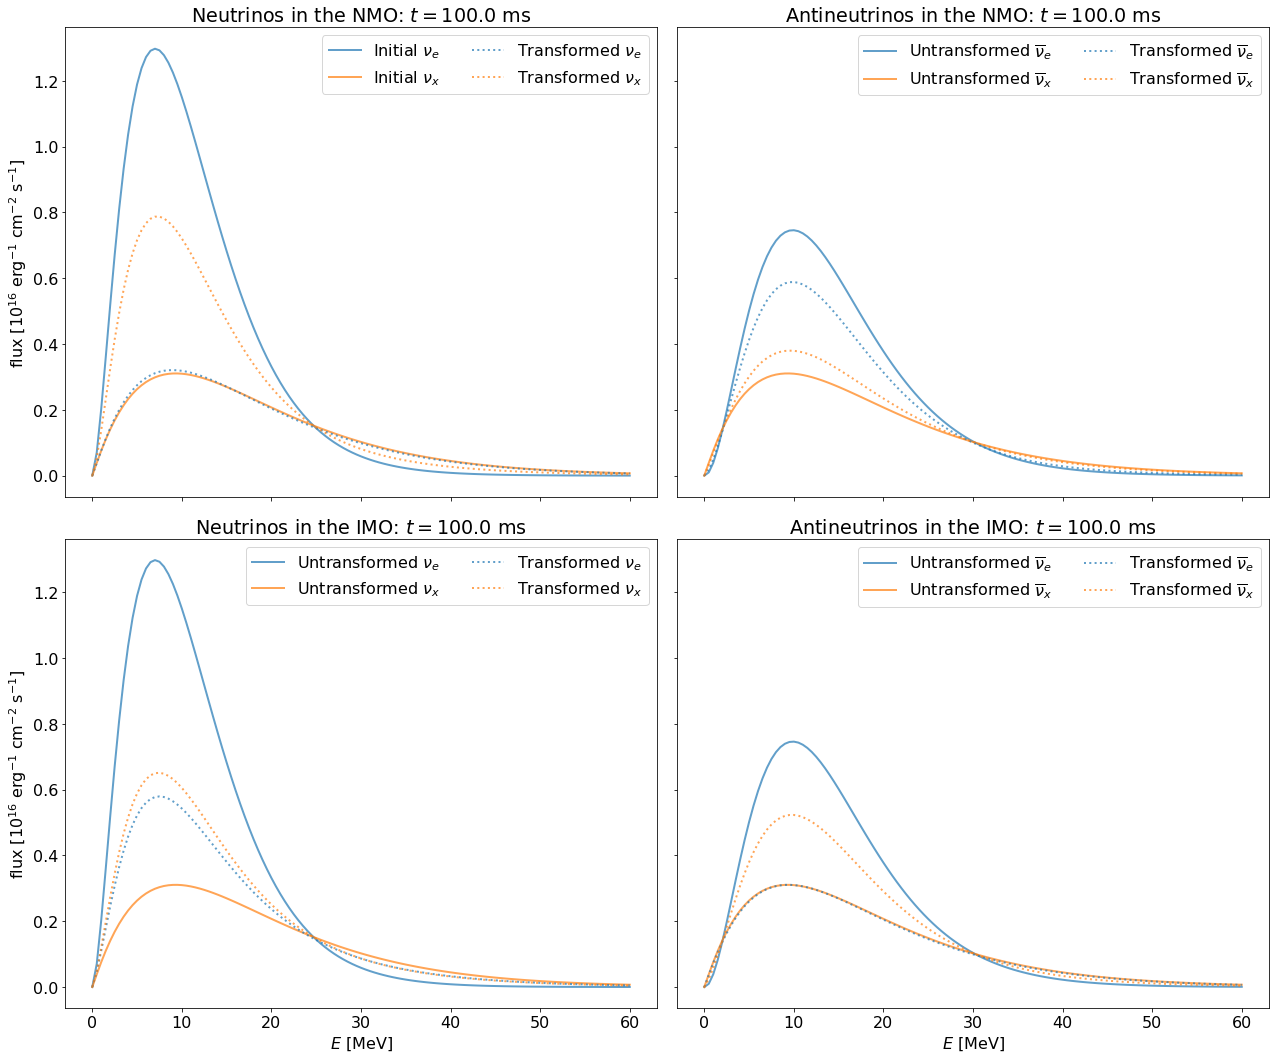

In [6]:
fig, axes = plt.subplots(2,2, figsize=(18,15), sharex=True, sharey=True, tight_layout=True)

for i, spec in enumerate([ispec, ospec_nmo]):
    axes[0][0].plot(energies, spec[Flavor.NU_E]/1e16, 
                    label='Untransformed '+Flavor.NU_E.to_tex() if i==0 else 'Transformed '+Flavor.NU_E.to_tex(),
                    color='C0', ls='-' if i==0 else ':', lw=2,  alpha=0.7)
    axes[0][0].plot(energies, spec[Flavor.NU_X]/1e16, 
                    label='Untransformed '+Flavor.NU_X.to_tex() if i==0 else 'Transformed '+Flavor.NU_X.to_tex(),
                    color='C1', ls='-' if i==0 else ':', lw=2,  alpha=0.7)

    axes[0][0].set(title='Neutrinos in the NMO: $t = ${:.1f}'.format(t))
    axes[0][0].grid()
    axes[0][0].legend(loc='upper right', ncol=2, fontsize=16)
    
    axes[0][1].plot(energies, spec[Flavor.NU_E_BAR]/1e16, 
                    label='Untransformed '+Flavor.NU_E_BAR.to_tex() if i==0 else 'Transformed '+Flavor.NU_E_BAR.to_tex(),
                    color='C0', ls='-' if i==0 else ':', lw=2,  alpha=0.7)
    axes[0][1].plot(energies, spec[Flavor.NU_X_BAR]/1e16, 
                    label='Untransformed '+Flavor.NU_X_BAR.to_tex() if i==0 else 'Transformed '+Flavor.NU_X_BAR.to_tex(),
                    color='C1', ls='-' if i==0 else ':', lw=2,  alpha=0.7)

    axes[0][1].set(title='Antineutrinos in the NMO: $t = ${:.1f}'.format(t)) 
    axes[0][1].grid()
    axes[0][1].legend(loc='upper right', ncol=2, fontsize=16)    
    
for i, spec in enumerate([ispec, ospec_imo]):
    axes[1][0].plot(energies, spec[Flavor.NU_E]/1e16, 
                    label='Untransformed '+Flavor.NU_E.to_tex() if i==0 else 'Transformed '+Flavor.NU_E.to_tex(),
                    color='C0', ls='-' if i==0 else ':', lw=2,  alpha=0.7)
    axes[1][0].plot(energies, spec[Flavor.NU_X]/1e16, 
                    label='Untransformed '+Flavor.NU_X.to_tex() if i==0 else 'Transformed '+Flavor.NU_X.to_tex(),
                    color='C1', ls='-' if i==0 else ':', lw=2,  alpha=0.7)

    axes[1][0].set(xlabel=r'$E$ [{}]'.format(energies.unit), title='Neutrinos in the IMO: $t = ${:.1f}'.format(t))
    axes[1][0].grid()
    axes[1][0].legend(loc='upper right', ncol=2, fontsize=16)
    
    axes[1][1].plot(energies, spec[Flavor.NU_E_BAR]/1e16, 
                    label='Untransformed '+Flavor.NU_E_BAR.to_tex() if i==0 else 'Transformed '+Flavor.NU_E_BAR.to_tex(),
                    color='C0', ls='-' if i==0 else ':', lw=2,  alpha=0.7)
    axes[1][1].plot(energies, spec[Flavor.NU_X_BAR]/1e16, 
                    label='Untransformed '+Flavor.NU_X_BAR.to_tex() if i==0 else 'Transformed '+Flavor.NU_X_BAR.to_tex(),
                    color='C1', ls='-' if i==0 else ':', lw=2,  alpha=0.7)

    axes[1][1].set(xlabel=r'$E$ [{}]'.format(energies.unit), title='Antineutrinos in the IMO: $t = ${:.1f}'.format(t))
    axes[1][1].grid()
    axes[1][1].legend(loc='upper right', ncol=2, fontsize=16)    

ax = axes[0][0]
ax.set(ylabel=r'flux [$10^{16}$ erg$^{-1}$ cm$^{-2}$ s$^{-1}$]')
ax = axes[1][0]
ax.set(ylabel=r'flux [$10^{16}$ erg$^{-1}$ cm$^{-2}$ s$^{-1}$]')

fig.tight_layout();